# Medical Cost Personal Datasets 

#### importing Libraries 

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
data = pd.read_csv('insurance.csv')

In [179]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [181]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Preprocessing

#### Checking Missing Values

In [182]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no any missing values in the datasets.

#### Categorical Features

In [183]:
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [184]:
df_sex = pd.get_dummies(data['sex'],drop_first=True)
df_smoker = pd.get_dummies(data['smoker'],drop_first=True)
df_region = pd.get_dummies(data['region'],drop_first=True)

In [185]:
data = pd.concat([data,df_sex,df_smoker,df_region],axis=1)

In [186]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [187]:
data = data.drop(['sex','smoker','region'],axis=1)

In [188]:
data.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [189]:
data.columns = ['age', 'bmi', 'children','charges' ,'male','yes', 'northwest',
       'southeast', 'southwest']

In [190]:
data.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [191]:
col = ['age', 'bmi', 'children', 'male', 'yes', 'northwest',
       'southeast', 'southwest','charges']
data = data[col]

In [192]:
data.head()

,age,bmi,children,male,yes,northwest,southeast,southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520


#### Spliting data into train and test sets

In [193]:
X = data.drop('charges',axis=1)
y = data['charges']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

### Scaling data using StandardScaler function . Standardisation involve centering the variable at 0 and standardising the variance to 1

In [194]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [216]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

#### Linear Regression

In [217]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_test = lm.predict(X_test)
pred_train = lm.predict(X_train)
# np.sqrt(mean_absolute_error(y_test,pred))
train =(mean_squared_error(y_train,pred_train))
test =(mean_squared_error(y_test,pred_test))
print("Train score:",train)
print("Test score:",test)
r2_score(y_test,pred_test)

Train score: 37730549.72357765
Test score: 33780509.574791655


0.769611805436901

#### Ridge Regression


In [208]:
prams = {'alpha':[1e-10,1e-5,1e-3,1e-2,0,1,3,5,10,15,20,30,40,50,55,100]}

In [210]:
grid_ridge = GridSearchCV(Ridge(),prams,scoring='neg_mean_squared_error',cv=5)

In [211]:
grid_ridge.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.01, 0, 1, 3, 5, 10,
                                   15, 20, 30, 40, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [212]:
grid_ridge.best_estimator_

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [218]:
ridge = Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
ridge.fit(X_train,y_train)
pred_ridge = ridge.predict(X_test)
mean_squared_error(y_test,pred_ridge)
r2_score(y_test,pred_ridge)


0.7695369198716985

#### Lasso Regression

In [219]:
lasso = GridSearchCV(Lasso(),prams,scoring='neg_mean_squared_error',cv=5)

In [240]:
lasso.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.01, 0, 1, 3, 5, 10,
                                   15, 20, 30, 40, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [241]:
lasso.best_params_

{'alpha': 100}

In [242]:
la = Lasso(alpha=100)

In [243]:
la.fit(X_train,y_train)
la.fit(X_train,y_train)
pred_la = la.predict(X_test)
mean_squared_error(y_test,pred_la)
r2_score(y_test,pred_la)


0.7691056163214449

#### ElesticNet Regression

In [229]:
ele = ElasticNet(alpha=100,l1_ratio=0.5)
ele.fit(X_train,y_train)
ele.fit(X_train,y_train)
pred_ele = ele.predict(X_test)
mean_squared_error(y_test,pred_ele)
r2_score(y_test,pred_ele)

0.028579994743126336

### Distribution plot

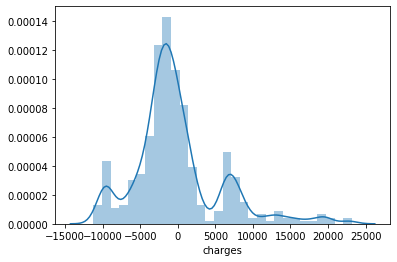

In [230]:
sns.distplot(y_test-pred_la)

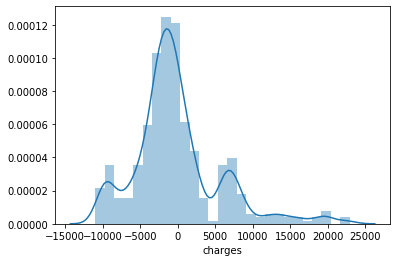

In [232]:
sns.distplot(y_test-pred_ridge)

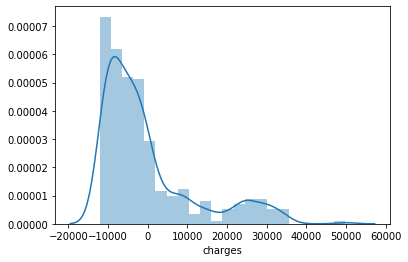

In [233]:
sns.distplot(y_test-pred_ele)

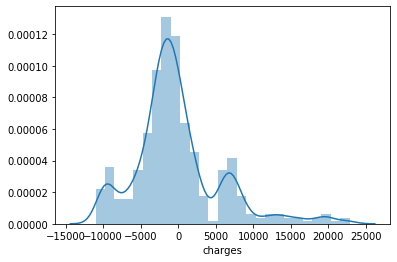

In [234]:
sns.distplot(y_test-pred_test)

### Finally , From all this modeling the accuracy is not so bad .so we select Lasso regression as final model.

# Saving model

In [235]:
from sklearn.externals import joblib

In [237]:
joblib.dump(la,'lassoRegressionModel')

['lassoRegressionModel']

In [238]:
joblib.dump(sc,'StandardScaler')

['StandardScaler']